In [99]:
import numpy as np
import sklearn.utils
import sklearn.preprocessing
import sklearn.metrics
import sklearn.cluster
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set_style('whitegrid')
import theano

import autoencoder
import imp # for reloading during dev
Autoencoder = imp.reload(autoencoder).Autoencoder

import pandas as pd
from IPython.display import display



<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 9 columns):
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
dtypes: float64(1), int64(8)
memory usage: 53.4 KB


None

MSSE Upper Bound: 9 , MSSE Convergence Goal: 0.8649
10 1.0074045570245636
20 1.0048063603189246
30 1.0015120663375394
40 0.9999581240373895
50 0.999221244947754
60 0.997036536109817
70 0.9960219466705259
80 0.9972332066496181
90 0.9937015737079332
100 0.9905753236680797
110 0.9889314748342182
120 0.9881588716990373
130 0.9858144719812598
140 0.9856541885694811
150 0.9850010829192022
160 0.9820890506221144
170 0.9807691672857796
180 0.9779504704645022
190 0.9774759681221372
200 0.9770156494976664
210 0.9730893667331265
220 0.9711060010989521
230 0.969852103158865
240 0.9675364013637621
250 0.9686270898446906
260 0.9685266698973742
270 0.965981561728819
280 0.9629088185535444
290 0.9591208779948384
300 0.9589068029910025
310 0.9564049025081071
320 0.9563340100478755
330 0.9542152293318654
340 0.9506273365229544
350 0.9495889069448858
360 0.9472020818132866
370 0.9434499036691917
380 0.9430464997601766
390 0.9349613239319159
400 0.9405794893562108
410 0.9340802575779775
420 0.933289874894

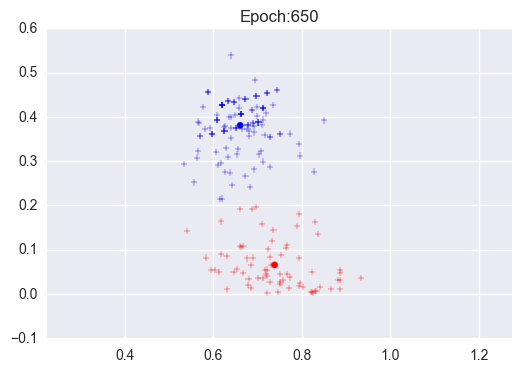

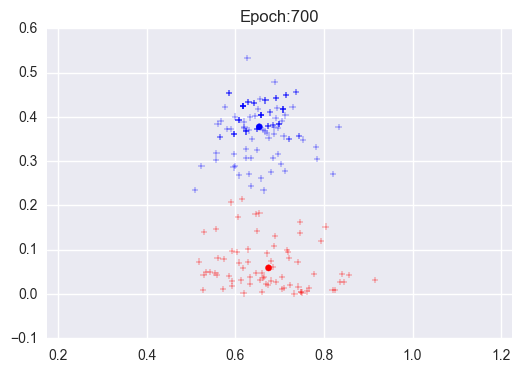

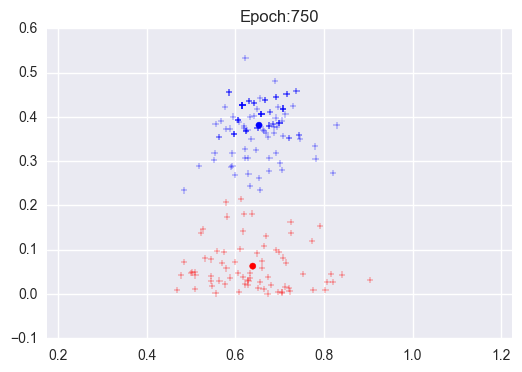

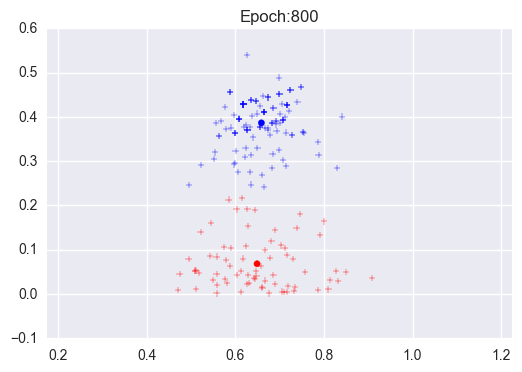

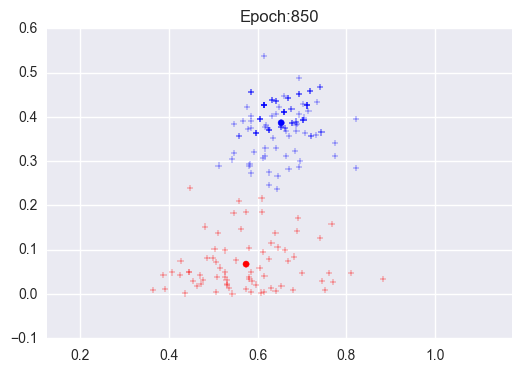

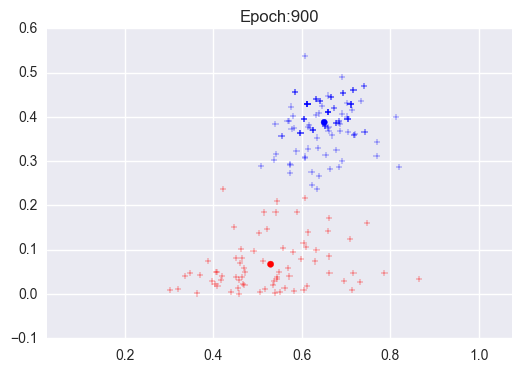

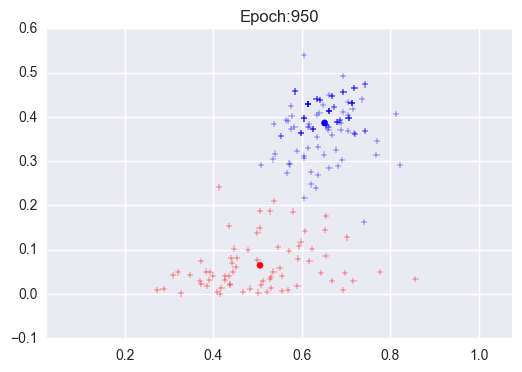

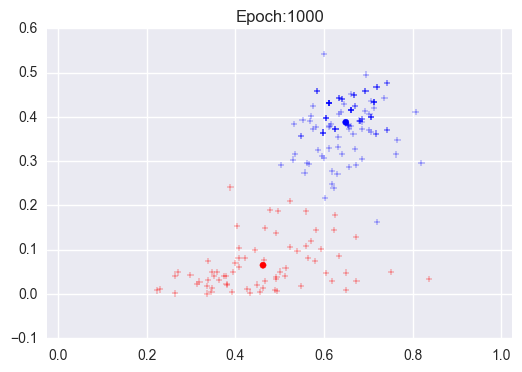

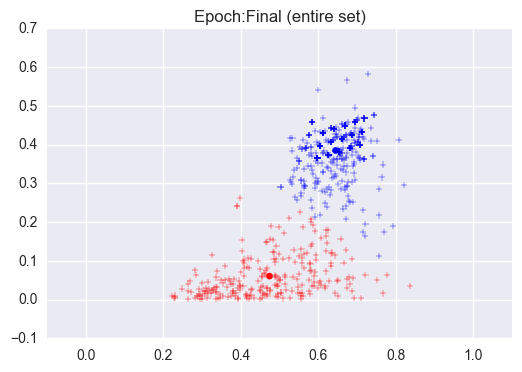

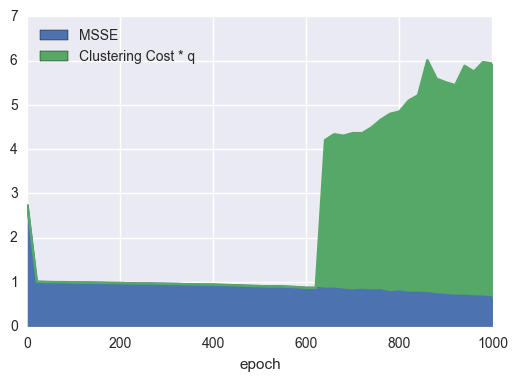

In [123]:
Autoencoder = imp.reload(autoencoder).Autoencoder
breastcancer_data_raw = pd.read_csv(
    'datasets/breast-cancer-wisconsin.data.txt', 
    header=None, 
    names=['ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'], 
    na_values=['?']
)
breastcancer_data_filtered = breastcancer_data_raw.dropna()
breastcancer_data_train = breastcancer_data_filtered.drop(['ID', 'Class'], axis=1)
breastcancer_data_target = breastcancer_data_filtered['Class']
display(breastcancer_data_train.info())
feature_count = len(breastcancer_data_train.columns)
bc_scaler = sklearn.preprocessing.MinMaxScaler()
bc_scaler.fit(breastcancer_data_train)
breastcancer_data = bc_scaler.transform(breastcancer_data_train)
tolerated_err_per_feature = 0.31
msse_convergence_goal = (tolerated_err_per_feature**2)*feature_count
msse_upper_bound = (1**2)*feature_count
print('MSSE Upper Bound:', msse_upper_bound, ', MSSE Convergence Goal:', msse_convergence_goal)

bc_ae = Autoencoder([9,2,9], training_set=breastcancer_data)
bc_ae.cluster(epochs=1000, learning_rate=3, q=2, k=2, minibatch_size=200, q_msse_threshold=msse_convergence_goal, plot_clusters_every_nth_epoch=50, collect_stats_every_nth_epoch=20)
bc_ae.plot_stats(stacked=True)

10 1.189860460249171
20 1.1699450648052216
30 1.1664948329312068
40 1.1655727296186162
50 1.1670300494805304
60 1.1630878361958645
70 1.1595842415033237
80 1.1570369666577844
90 1.1592719492500188
100 1.1598491812584888
110 1.1568159528632476
120 1.1528673249137755
130 1.149965607987755
140 1.151911734270501
150 1.148052965670733
160 1.1507986382466917
170 1.1466347951338034
180 1.1478183281868393
190 1.1475104475863334
200 1.139695104493388
210 1.1412505017741479
220 1.137266116233207
230 1.1386394614121522
240 1.1366049626721928
250 1.137396093775126
260 1.1362862257110813
270 1.1313034302899716
280 1.131656999462116
290 1.1294678922683636
300 1.125785439042411
310 1.1310926158864276
320 1.1268028736326199
330 1.1257824095544875
340 1.1265222420203125
350 1.1255321645568117
360 1.121939228214079
370 1.1195367330498982
380 1.12111503851201
390 1.1172700120116876
400 1.1167257063579072
410 1.1138457029574598
420 1.1157010954285482
430 1.1164901388572215
440 1.1146095327720045
450 1.112

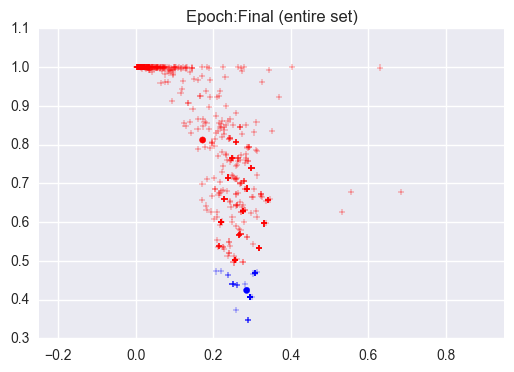

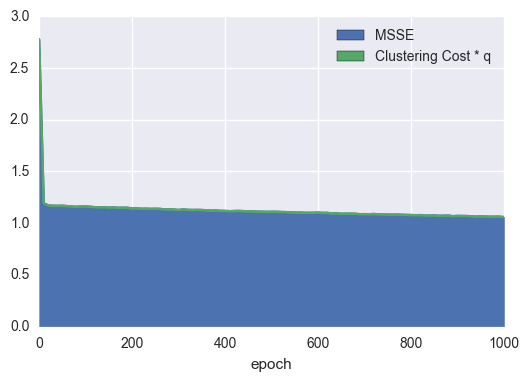

In [126]:
bc_ae2 = Autoencoder([9,2,9], training_set=breastcancer_data)
# bc_ae2.train(epochs=200, learning_rate=0.1, minibatch_size=200, collect_stats_every_nth_epoch=1)
bc_ae2.cluster(epochs=1000, learning_rate=3, q=2, k=2, minibatch_size=200, q_msse_threshold=0.01, plot_clusters_every_nth_epoch=50, collect_stats_every_nth_epoch=10)
bc_ae2.plot_stats(stacked=True)
#bc_ae2 = bc_ae

In [130]:
m1 = 'Pure K-Means'
kmeans_res = sklearn.cluster.KMeans(n_clusters=2, max_iter=500, n_init=10).fit(breastcancer_data)
rating_kmeans = sklearn.metrics.adjusted_rand_score(breastcancer_data_target.values, kmeans_res.labels_)

m2 = 'Autoencoder-based clustering with clustering cost'
rating_aec = sklearn.metrics.adjusted_rand_score(breastcancer_data_target.values,bc_ae.current_cluster_assignment.get_value())

m3 ='Autoencoder\'s hidden layer clustered with k-means'
ae_H = theano.function([bc_ae2.X], bc_ae2.H)(breastcancer_data)
ae_kmeans_res = sklearn.cluster.KMeans(n_clusters=2, max_iter=500, n_init=10).fit(ae_H)
rating_ae_kmeans = sklearn.metrics.adjusted_rand_score(breastcancer_data_target.values, ae_kmeans_res.labels_)
pd.DataFrame([(rating_kmeans, m1),(rating_aec, m2),(rating_ae_kmeans, m3)], columns=['Adjusted Rand Score', 'Method'])

,Adjusted Rand Score,Method
0,0.846468,Pure K-Means
1,0.814427,Autoencoder-based clustering with clustering cost
2,0.659382,Autoencoder's hidden layer clustered with k-means
